In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

**Cargar el conjunto de datos**

In [2]:
df_store_sales = pd.read_csv('../data/raw/train.csv')
df_store_sales.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


**Cantidad de filas y columnas**

In [3]:
filas, columnas = df_store_sales.shape
print(f'Filas: {filas}\nColumnas: {columnas}')

Filas: 9800
Columnas: 18


**Estructura y tipo de datos**

In [4]:
df_store_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

Los tipos de datos son correctos en la mayoria de las columnas, con excepción de unos como:
* Order Date y Ship Date que son tipo ``objec`` cuando deberian ser de tipo Date.
* Postal Code es de tipo ``float64`` lo cual es parcialmente correcto, debearia de ser tipo `int64`


**Identificar valores nulos**

In [5]:
cantidad_valores_nulos = df_store_sales.isnull().sum()
print(f'Cantidad de valores nulos\n{cantidad_valores_nulos}')

Cantidad de valores nulos
Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64


Se identificaron 11 valores nulos en la columna ``Postal Code``.

In [6]:
filas_valores_nulos = df_store_sales[df_store_sales.isnull().any(axis=1)]
filas_valores_nulos

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,2235,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,07/11/2016,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,06/04/2017,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


Se identificaron las filas con valores nulos en la columna `Postal Code` (Se analiza para determinar si es posible rellenar con los datos que se tienen)

Customer ID     
- QJ-19255
- SV-20785
- VM-21685	
- CB-12535	
- RM-19375	

In [7]:
estado_codigo_postal = df_store_sales[df_store_sales['State'] == 'Vermont']
estado_codigo_postal

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,2235,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,07/11/2016,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,06/04/2017,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


Se determino que los valores nulos de `Postal Code` corresponden una sola ciudad y estado (United States, Burlington, Vermont), por lo que una pequeña busqueda en internet se encontro el código postal que es `05403`.

**Valores duplicados**

In [8]:
valores_duplicados = df_store_sales.duplicated().sum()
print(f'Cantidad de valores duplicados:\n{valores_duplicados}')

Cantidad de valores duplicados:
0


No se identificaron valores duplicados en el cojunto de datos.

**Identificar errores ortográficos**

In [9]:
def detectar_palabras_unicas(nombre_columna):
    # Obtener la lista de nombres únicos y limpios
    nombres_unicos = df_store_sales[nombre_columna].dropna().unique()

    # Un umbral de similitud para considerar que dos nombres son "similares"
    UMBRAL_SIMILITUD = 90 # Porcentaje de similitud (0-100). Ajusta según tu necesidad.

    print("\nPosibles inconsistencias detectadas por similitud (Fuzzy Matching):\n")

    # Para evitar comparaciones duplicadas y auto-comparaciones
    nombres_revisados = set()

    for i, nombre1 in enumerate(nombres_unicos):
        if nombre1 in nombres_revisados:
            continue

        # Encuentra nombres similares a 'nombre1' en el resto de la lista
        # Usamos process.extractBests para obtener los mejores scores
        # filter_matches=True para no incluir el nombre exacto si el umbral es 100
        similares = process.extractBests(nombre1, nombres_unicos,
                                        scorer=fuzz.ratio, # Puedes probar fuzz.token_sort_ratio o fuzz.token_set_ratio
                                        score_cutoff=UMBRAL_SIMILITUD)

        # Filtrar para obtener solo coincidencias que no son idénticas a nombre1
        # y que no hemos procesado ya como el "primer" nombre de un par
        potenciales_errores = [
            (nombre_similar, score) for nombre_similar, score in similares
            if nombre_similar != nombre1 and nombre_similar not in nombres_revisados
        ]

        if potenciales_errores:
            print(f"'{nombre1}' (Frecuencia: {df_store_sales[nombre_columna].value_counts()[nombre1]}):")
            for nombre_similar, score in potenciales_errores:
                print(f"  - Posible inconsistencia: '{nombre_similar}' (Frecuencia: {df_store_sales[nombre_columna].value_counts()[nombre_similar]}, Similitud: {score}%)")
                nombres_revisados.add(nombre_similar) # Marca este nombre como revisado
            nombres_revisados.add(nombre1) # Marca también el nombre principal

    print("\n--- Fin de la revisión de inconsistencias por similitud ---")

In [10]:
# Ship Mode
identificar_errores_ship_mode = df_store_sales['Ship Mode'].value_counts()
print(f'Identificación de errores de entrada: {identificar_errores_ship_mode}')

Identificación de errores de entrada: Ship Mode
Standard Class    5859
Second Class      1902
First Class       1501
Same Day           538
Name: count, dtype: int64


In [11]:
# Customer Name
df_store_sales['customer_name_normalizado'] = df_store_sales['Customer Name'].str.lower().str.strip()
detectar_palabras_unicas('customer_name_normalizado')

# print(f'Identificación de errores de entrada: {df_store_sales['customer_name_normalizado'].value_counts().sort_values(ascending=True).head(30)}')


Posibles inconsistencias detectadas por similitud (Fuzzy Matching):


--- Fin de la revisión de inconsistencias por similitud ---


In [12]:
# Segment
identificar_errores_segment = df_store_sales['Segment'].value_counts()
print(f'Identificación de errores de entrada: {identificar_errores_segment}')

Identificación de errores de entrada: Segment
Consumer       5101
Corporate      2953
Home Office    1746
Name: count, dtype: int64


In [13]:
# Country
identificar_errores_country = df_store_sales['Country'].value_counts()
print(f'Identificación de errores de entrada: {identificar_errores_country}')

Identificación de errores de entrada: Country
United States    9800
Name: count, dtype: int64


In [14]:
# City
df_store_sales['city_normalizado'] = df_store_sales['City'].str.lower().str.strip()
detectar_palabras_unicas('city_normalizado')


Posibles inconsistencias detectadas por similitud (Fuzzy Matching):

'orland park' (Frecuencia: 1):
  - Posible inconsistencia: 'overland park' (Frecuencia: 6, Similitud: 92%)
'edmond' (Frecuencia: 2):
  - Posible inconsistencia: 'edmonds' (Frecuencia: 14, Similitud: 92%)
  - Posible inconsistencia: 'redmond' (Frecuencia: 11, Similitud: 92%)
'amarillo' (Frecuencia: 10):
  - Posible inconsistencia: 'camarillo' (Frecuencia: 5, Similitud: 94%)
'trenton' (Frecuencia: 13):
  - Posible inconsistencia: 'renton' (Frecuencia: 3, Similitud: 92%)

--- Fin de la revisión de inconsistencias por similitud ---


Las ciudades que aparecen com posibles inconsistencias no son inconsistencias son ciudades que si existen y que no representan errores.

In [15]:
# State
identificar_errores_state = df_store_sales['State'].value_counts()
print(f'Identificación de errores de entrada: {identificar_errores_state.sort_index(ascending=True)}')

Identificación de errores de entrada: State
Alabama                   61
Arizona                  223
Arkansas                  60
California              1946
Colorado                 179
Connecticut               82
Delaware                  93
District of Columbia      10
Florida                  373
Georgia                  177
Idaho                     21
Illinois                 483
Indiana                  135
Iowa                      26
Kansas                    24
Kentucky                 137
Louisiana                 41
Maine                      8
Maryland                 105
Massachusetts            135
Michigan                 253
Minnesota                 89
Mississippi               53
Missouri                  66
Montana                   15
Nebraska                  38
Nevada                    39
New Hampshire             27
New Jersey               122
New Mexico                37
New York                1097
North Carolina           247
North Dakota               7

In [16]:
# Region
identificar_errores_region = df_store_sales['Region'].value_counts()
print(f'Identificación de errores de entrada: {identificar_errores_region}')

Identificación de errores de entrada: Region
West       3140
East       2785
Central    2277
South      1598
Name: count, dtype: int64


In [17]:
# Category
identificar_errores_categoria = df_store_sales['Category'].value_counts()
print(f'Identificación de errores de entrada: {identificar_errores_categoria}')

Identificación de errores de entrada: Category
Office Supplies    5909
Furniture          2078
Technology         1813
Name: count, dtype: int64


In [18]:
# Sub-Category
identificar_errores_sub_Category = df_store_sales['Sub-Category'].value_counts()
print(f'Identificación de errores de entrada: {identificar_errores_sub_Category.sort_index(ascending=True)}')


Identificación de errores de entrada: Sub-Category
Accessories     756
Appliances      459
Art             785
Binders        1492
Bookcases       226
Chairs          607
Copiers          66
Envelopes       248
Fasteners       214
Furnishings     931
Labels          357
Machines        115
Paper          1338
Phones          876
Storage         832
Supplies        184
Tables          314
Name: count, dtype: int64


In [19]:
# Product Name
df_store_sales['product_name_normalizado'] = df_store_sales['Product Name'].str.lower().str.strip()
detectar_palabras_unicas('product_name_normalizado')


Posibles inconsistencias detectadas por similitud (Fuzzy Matching):

'hon deluxe fabric upholstered stacking chairs, rounded back' (Frecuencia: 12):
  - Posible inconsistencia: 'hon deluxe fabric upholstered stacking chairs, squared back' (Frecuencia: 2, Similitud: 93%)
'eldon expressions wood and plastic desk accessories, cherry wood' (Frecuencia: 5):
  - Posible inconsistencia: 'eldon expressions wood and plastic desk accessories, oak' (Frecuencia: 5, Similitud: 90%)
'newell 322' (Frecuencia: 6):
  - Posible inconsistencia: 'newell 32' (Frecuencia: 6, Similitud: 95%)
  - Posible inconsistencia: 'newell 324' (Frecuencia: 6, Similitud: 90%)
  - Posible inconsistencia: 'newell 342' (Frecuencia: 1, Similitud: 90%)
  - Posible inconsistencia: 'newell 327' (Frecuencia: 4, Similitud: 90%)
'xerox 1967' (Frecuencia: 5):
  - Posible inconsistencia: 'xerox 196' (Frecuencia: 8, Similitud: 95%)
  - Posible inconsistencia: 'xerox 197' (Frecuencia: 3, Similitud: 95%)
  - Posible inconsistencia: 'x

Los nombre de productos que aparcen como posible inconsistencias son variantes de otro (osea productos diferentes).

*No se encontraron errores de entrada en el conjunto de datos*

**Estadistica**

In [35]:
# Obtener la media de Sales
media_sales = np.mean(df_store_sales['Sales'])

# Obtner la mediana de Sales
mediana_sales = np.median(df_store_sales['Sales'])

# Obtner la desviación estandar de Sales
desviacion_estandar_sales = np.std(df_store_sales['Sales'])

# Obtener la varianza de Sales
vairanza_sales = np.var(df_store_sales['Sales'])

print(f'''
Media(promedio) de Sales: {media_sales:>20.2f}
Mediana de Sales: {mediana_sales:>28.2f}
Desviación Estandar de Sales: {desviacion_estandar_sales:>16.2f}
Vairanza de Sales: {vairanza_sales:>27.2f}
''')


Media(promedio) de Sales:               230.77
Mediana de Sales:                        54.49
Desviación Estandar de Sales:           626.62
Vairanza de Sales:                   392652.50



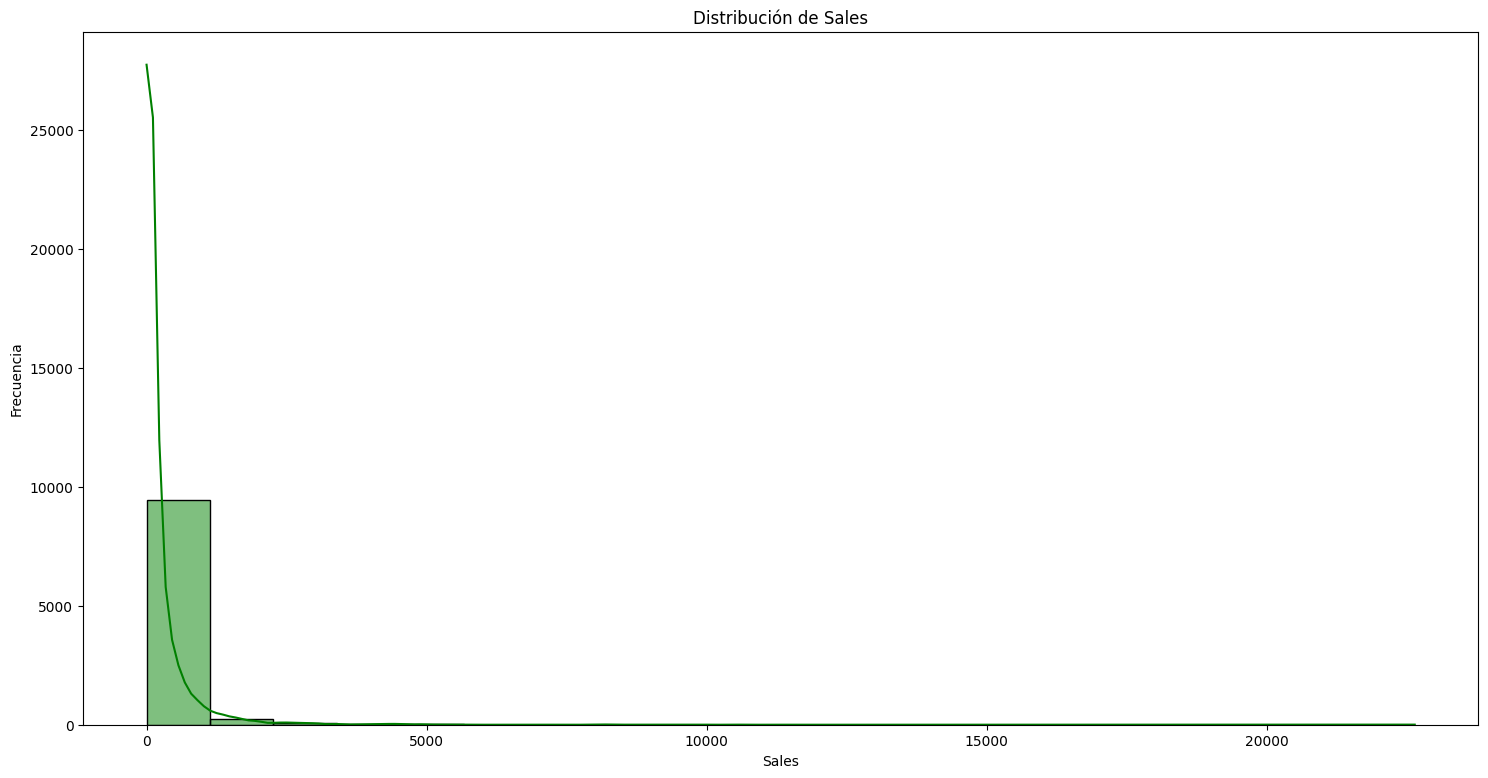

In [ ]:
# Tipo de distribución 
ventas = df_store_sales['Sales']

plt.figure(figsize=(18,9))
sns.histplot(ventas, bins=20, kde=True, color='g')
plt.title('Distribución de Sales')
plt.xlabel('Sales')
plt.ylabel('Frecuencia')
plt.show()

In [41]:
# Detección de valores atípicos

# Calcular Q1, Q3 e IQR
Q1 = df_store_sales['Sales'].quantile(0.25)
Q3 = df_store_sales['Sales'].quantile(0.75)
IQR = Q3 - Q1

# Calcular límites para outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"IQR: {IQR}")
print(f"Límite Inferior (IQR): {limite_inferior}")
print(f"Límite Superior (IQR): {limite_superior}")

# Encontrar outliers
outliers_iqr = df_store_sales[(df_store_sales['Sales'] < limite_inferior) | (df_store_sales['Sales'] > limite_superior)]

print("\nValores atípicos usando el método IQR:")
outliers_iqr

Q1: 17.248
Q3: 210.60500000000002
IQR: 193.35700000000003
Límite Inferior (IQR): -272.7875000000001
Límite Superior (IQR): 500.6405000000001

Valores atípicos usando el método IQR:


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,customer_name_normalizado,city_normalizado,product_name_normalizado
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,claire gute,henderson,"hon deluxe fabric upholstered stacking chairs,..."
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,sean o'donnell,fort lauderdale,bretford cr4500 series slim rectangular table
7,8,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032.0,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520,brosina hoffman,los angeles,mitel 5320 ip phone voip phone
10,11,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032.0,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,brosina hoffman,los angeles,chromcraft rectangular conference tables
11,12,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032.0,West,TEC-PH-10002033,Technology,Phones,Konftel 250 Conference phone - Charcoal black,911.4240,brosina hoffman,los angeles,konftel 250 conference phone - charcoal black
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9759,9760,CA-2017-146913,31/10/2017,05/11/2017,Standard Class,SF-20965,Sylvia Foulston,Corporate,United States,San Francisco,...,94109.0,West,FUR-CH-10001854,Furniture,Chairs,Office Star - Professional Matrix Back Chair w...,1403.9200,sylvia foulston,san francisco,office star - professional matrix back chair w...
9774,9775,CA-2015-169019,26/07/2015,30/07/2015,Standard Class,LF-17185,Luke Foster,Consumer,United States,San Antonio,...,78207.0,Central,OFF-BI-10004995,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System,2177.5840,luke foster,san antonio,gbc docubind p400 electric binding system
9781,9782,CA-2017-153178,14/09/2017,18/09/2017,Standard Class,CL-12565,Clay Ludtke,Consumer,United States,Long Beach,...,11561.0,East,OFF-BI-10004390,Office Supplies,Binders,GBC DocuBind 200 Manual Binding Machine,673.5680,clay ludtke,long beach,gbc docubind 200 manual binding machine
9787,9788,CA-2018-144491,27/03/2018,01/04/2018,Standard Class,CJ-12010,Caroline Jumper,Consumer,United States,Houston,...,77070.0,Central,FUR-BO-10001811,Furniture,Bookcases,"Atlantic Metals Mobile 5-Shelf Bookcases, Cust...",1023.3320,caroline jumper,houston,"atlantic metals mobile 5-shelf bookcases, cust..."


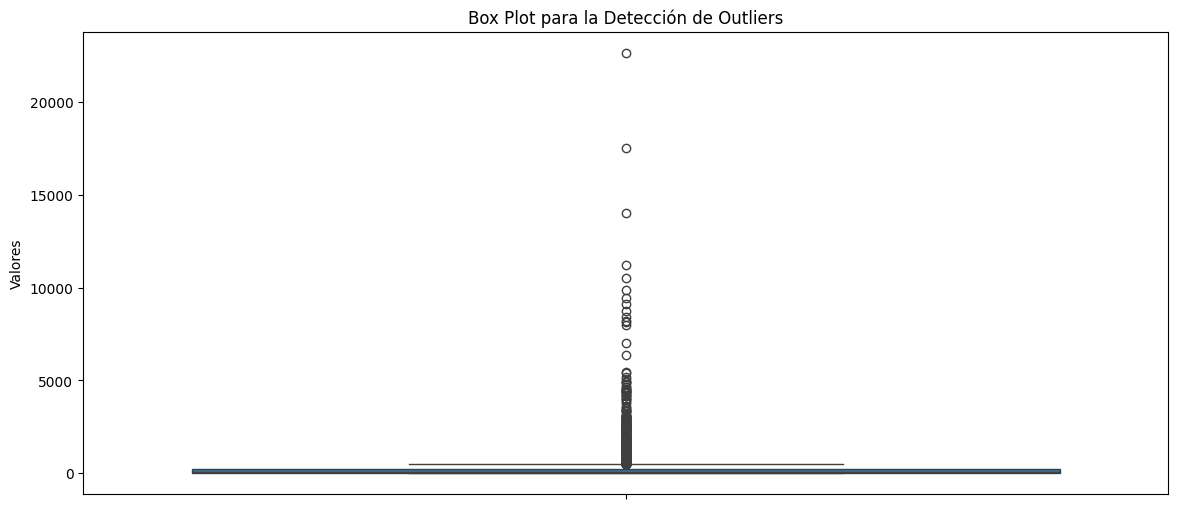

In [42]:
ventas = df_store_sales['Sales']

plt.figure(figsize=(14, 6))
sns.boxplot(y=ventas)
plt.title('Box Plot para la Detección de Outliers')
plt.ylabel('Valores')
plt.show()

In [43]:
# Encontrar los valores atípicos (outliers)
Q1 = 17.248
Q3 = 210.60500000000002
IQR = 193.35700000000003
limite_inferior = -272.7875000000001
limite_superior = 500.6405000000001

# Ejemplo de serie de ventas (con algunos valores que caerían como outliers)
ventas = df_store_sales['Sales']

print("Serie de ventas de ejemplo:\n", ventas)
print(f"\nLímite Superior para Outliers (ventas): {limite_superior}")

outliers_ventas = ventas[ventas > limite_superior]

print("\nValores atípicos (outliers) en 'Sales' usando el método IQR:")
print(outliers_ventas)

# También puedes ver la cantidad de outliers
print(f"\nNúmero de valores atípicos encontrados: {len(outliers_ventas)}")

Serie de ventas de ejemplo:
 0       261.9600
1       731.9400
2        14.6200
3       957.5775
4        22.3680
          ...   
9795      3.7980
9796     10.3680
9797    235.1880
9798     26.3760
9799     10.3840
Name: Sales, Length: 9800, dtype: float64

Límite Superior para Outliers (ventas): 500.6405000000001

Valores atípicos (outliers) en 'Sales' usando el método IQR:
1        731.9400
3        957.5775
7        907.1520
10      1706.1840
11       911.4240
          ...    
9759    1403.9200
9774    2177.5840
9781     673.5680
9787    1023.3320
9788     600.5580
Name: Sales, Length: 1145, dtype: float64

Número de valores atípicos encontrados: 1145


In [48]:
# Filas completas 
filas_completas_outliers = df_store_sales.loc[outliers_ventas.index]

filas_completas_outliers.head(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,customer_name_normalizado,city_normalizado,product_name_normalizado
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,claire gute,henderson,"hon deluxe fabric upholstered stacking chairs,..."
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,sean o'donnell,fort lauderdale,bretford cr4500 series slim rectangular table
7,8,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032.0,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520,brosina hoffman,los angeles,mitel 5320 ip phone voip phone
10,11,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032.0,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,brosina hoffman,los angeles,chromcraft rectangular conference tables
11,12,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032.0,West,TEC-PH-10002033,Technology,Phones,Konftel 250 Conference phone - Charcoal black,911.4240,brosina hoffman,los angeles,konftel 250 conference phone - charcoal black
16,17,CA-2015-105893,11/11/2015,18/11/2015,Standard Class,PK-19075,Pete Kriz,Consumer,United States,Madison,...,53711.0,Central,OFF-ST-10004186,Office Supplies,Storage,"Stur-D-Stor Shelving, Vertical 5-Shelf: 72""H x...",665.8800,pete kriz,madison,"stur-d-stor shelving, vertical 5-shelf: 72""h x..."
24,25,CA-2016-106320,25/09/2016,30/09/2016,Standard Class,EB-13870,Emily Burns,Consumer,United States,Orem,...,84057.0,West,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,1044.6300,emily burns,orem,bretford cr4500 series slim rectangular table
27,28,US-2016-150630,17/09/2016,21/09/2016,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,19140.0,East,FUR-BO-10004834,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.4300,tracy blumstein,philadelphia,"riverside palais royal lawyers bookcase, royal..."
35,36,CA-2017-117590,08/12/2017,10/12/2017,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,...,75080.0,Central,TEC-PH-10004977,Technology,Phones,GE 30524EE4,1097.5440,gene hale,richardson,ge 30524ee4
38,39,CA-2016-117415,27/12/2016,31/12/2016,Standard Class,SN-20710,Steve Nguyen,Home Office,United States,Houston,...,77041.0,Central,FUR-BO-10002545,Furniture,Bookcases,"Atlantic Metals Mobile 3-Shelf Bookcases, Cust...",532.3992,steve nguyen,houston,"atlantic metals mobile 3-shelf bookcases, cust..."


In [96]:
# Tabla dinamica para Order ID
td_order_id = pd.pivot_table(
    data=filas_completas_outliers,
    values='Sales',
    index=['Order ID','Order Date','Customer ID','Customer Name','Segment','Category','Product ID','Product Name'],
    aggfunc='sum'
)

print(filas_completas_outliers['Category'].value_counts())
td_order_id

Category
Furniture          459
Technology         394
Office Supplies    292
Name: count, dtype: int64


,,,,,,,,Sales
Order ID,Order Date,Customer ID,Customer Name,Segment,Category,Product ID,Product Name,
CA-2015-100090,08/07/2015,EB-13705,Ed Braxton,Corporate,Furniture,FUR-TA-10003715,Hon 2111 Invitation Series Corner Table,502.488
CA-2015-100916,21/10/2015,FH-14275,Frank Hawley,Corporate,Furniture,FUR-TA-10004607,Hon 2111 Invitation Series Straight Table,591.320
CA-2015-101602,15/12/2015,MC-18100,Mick Crebagga,Consumer,Furniture,FUR-CH-10004675,"Lifetime Advantage Folding Chairs, 4/Carton",763.280
CA-2015-101931,28/10/2015,TS-21370,Todd Sumrall,Corporate,Furniture,FUR-BO-10001337,O'Sullivan Living Dimensions 2-Shelf Bookcases,616.998
CA-2015-102274,21/11/2015,DH-13075,Dave Hallsten,Corporate,Office Supplies,OFF-PA-10004359,Multicolor Computer Printout Paper,629.100
...,...,...,...,...,...,...,...,...
US-2018-167402,13/01/2018,CP-12085,Cathy Prescott,Corporate,Office Supplies,OFF-SU-10002881,Martin Yale Chadless Opener Electric Letter Opener,4164.050
US-2018-167920,09/12/2018,JL-15835,John Lee,Consumer,Technology,TEC-CO-10001046,Canon Imageclass D680 Copier / Fax,1399.980
US-2018-168116,04/11/2018,GT-14635,Grant Thornton,Corporate,Technology,TEC-MA-10004125,Cubify CubeX 3D Printer Triple Head Print,7999.980


In [103]:
# Guardar conjunto de datos con outliers
filas_completas_outliers.to_csv('../data/raw/store_sales_con_outliers.csv', index=False)

Se guardara los datos con outliers detectados para un analisis más profundo.

***Nota:*** Los outliders encontrados no parecen ser un error a simple vista, parece ser más el paso del tiempo (fechas) como precios de temporada, ofertas especiales/liquidaciones, lanzamientos de nuevos productos inclusive la inflación puede ser un factor.